In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df=pd.merge(study_results,mouse_metadata,how="inner", on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
#check the number of mice
len(combined_df["Mouse ID"].unique())

249

In [3]:
#find the duplicate mouse and display its data 
duplicate_df = combined_df[combined_df.duplicated(
    subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [ ]:
#remove the duplicate mouse from the data frame to clean it
clean_df=combined_df[combined_df["Mouse ID"]!="g989"]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
#check the mouse count
len(clean_df["Mouse ID"].unique())

248

In [6]:
#using the aggregate function, find the mean, median, variance, standard deviation and 
# standard error of the mean an rename the columns for better presentation
by_tumor_volume = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem=lambda x: st.sem(x)  # Standard Error of the Mean
)
by_tumor_volume_df=pd.DataFrame(by_tumor_volume)
by_tumor_volume_df=by_tumor_volume_df.rename(columns={"mean":"Mean Tumor Volume",
                                "median":"Median Tumor Volume",
                                "variance":"Tumor Volume Variance",
                                "std_dev":"Tumor Volume Std. Dev.",
                                "sem":"Tumor Volume Std. Err."})
by_tumor_volume_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


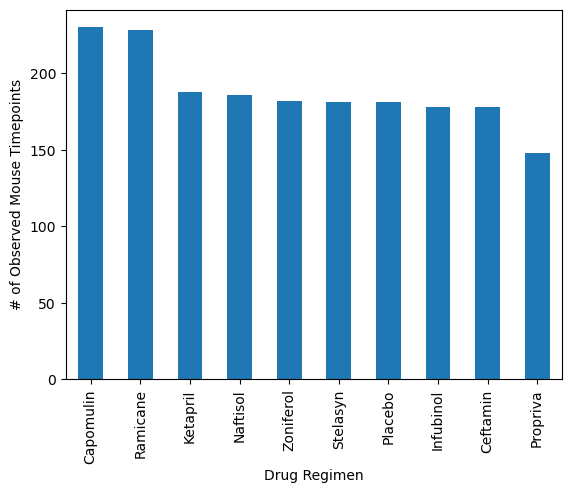

In [ ]:
#Bar plot of total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
y_axis=clean_df["Drug Regimen"].value_counts()
y_axis.plot(kind="bar")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

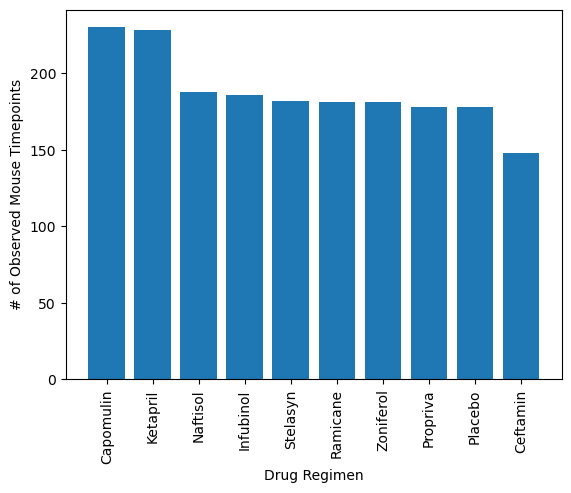

In [ ]:
#Bar plot of total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot
x_axis=clean_df["Drug Regimen"].unique()
plt.bar(x_axis,y_axis)
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.show()

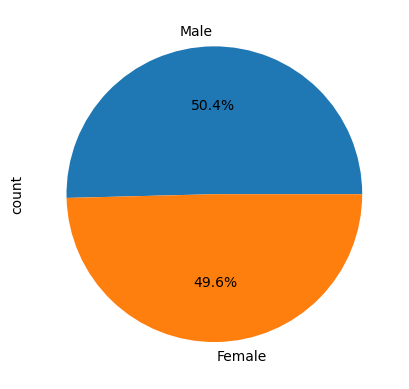

In [10]:
#pie chart of genders of unique mice using pandas
unique_mice = clean_df[['Mouse ID', 'Sex']].drop_duplicates()
gender_counts=unique_mice["Sex"].value_counts()
gender_counts.plot(kind="pie",autopct="%1.1f%%")
plt.show()


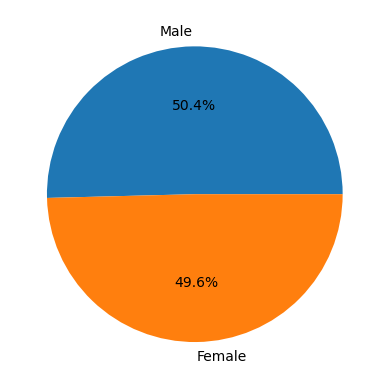

In [11]:
#pie chart of genders of unique mice using pyplot
plt.pie(gender_counts,labels=gender_counts.index,autopct="%1.1f%%")
plt.show()


In [12]:
#find the final timepoint for each mouse then merge with the original data frame 
#in order to see tumor volume at the final timepoint
final_time= clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
merge_df=pd.merge(clean_df,final_time,how="inner", on="Mouse ID")
max_timepoint_df = merge_df[merge_df['Timepoint_x'] == merge_df['Timepoint_y']].reset_index()
max_timepoint_df.rename(columns={"Timepoint_y":"Max Timepoint"})

,index,Mouse ID,Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max Timepoint
0,1,f932,0,45.000000,0,Ketapril,Male,15,29,0
1,20,x336,0,45.000000,0,Naftisol,Female,4,29,0
2,53,h428,0,45.000000,0,Ketapril,Female,1,27,0
3,55,v199,0,45.000000,0,Naftisol,Female,17,29,0
4,108,o848,0,45.000000,0,Stelasyn,Female,14,27,0
...,...,...,...,...,...,...,...,...,...,...
243,1875,r944,45,41.581521,2,Capomulin,Male,12,25,45
244,1876,u364,45,31.023923,3,Capomulin,Male,18,17,45
245,1877,p438,45,61.433892,1,Ceftamin,Female,11,26,45
246,1878,x773,45,58.634971,4,Placebo,Female,21,30,45


In [ ]:
#treatments in a list
treatments=["Capomulin","Ramicane","Infubinol","Ceftamin"]
#empty list for final tumor volume 
tumor_vol_data=[]
#loop through the treatments in the list to find 
# final tumor volumes, iqr and outliers for these treatments
for treatment in treatments:
    treatment_data=max_timepoint_df[max_timepoint_df["Drug Regimen"] == treatment]
    tumor_vol_data.append(treatment_data["Tumor Volume (mm3)"].values)
    q1=treatment_data["Tumor Volume (mm3)"].quantile(.25)    
    q3=treatment_data["Tumor Volume (mm3)"].quantile(.75)
    iqr=q3-q1  
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers=treatment_data[
        (treatment_data["Tumor Volume (mm3)"] < lower_bound) | 
        (treatment_data["Tumor Volume (mm3)"] > upper_bound)
    ]  
    print(f"{treatment}'s potential outliers: {outliers["Tumor Volume (mm3)"]}") 

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


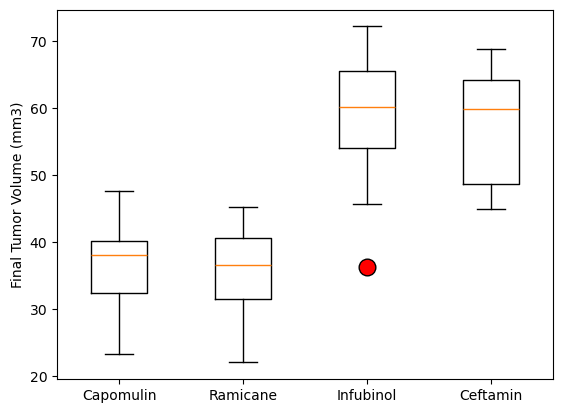

In [14]:
#box plots of each treatment with outlier displayed on one chart
fig, ax = plt.subplots()
ax.boxplot(tumor_vol_data,flierprops={
    "marker": "o",
    "markerfacecolor": "red",
    "markeredgecolor": "black",
    "markersize":12})
ax.set_xticklabels(treatments)
ax.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

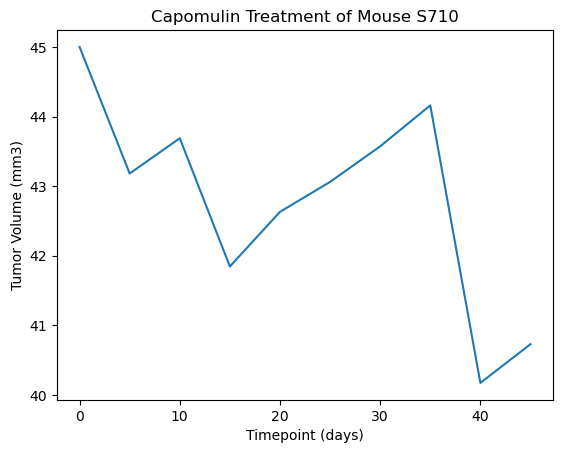

In [15]:
#line plot of tumor volume vs. time point for a single mouse treated with Capomulin (s710)
cap_mice=clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
mouse_s710=clean_df[clean_df["Mouse ID"]=="s710"]
plt.plot(mouse_s710["Timepoint"],mouse_s710["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment of Mouse S710")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

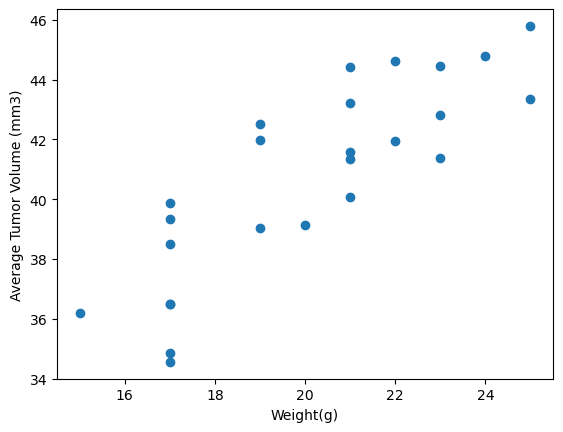

In [16]:
#scatter plot of mouse weight vs. the average observed tumor volume 
#for the entire Capomulin regimen
mean_tumor_volumes = cap_mice.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
weight=cap_mice.groupby("Mouse ID")["Weight (g)"].mean()
plt.scatter(weight,mean_tumor_volumes)
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight(g)")
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


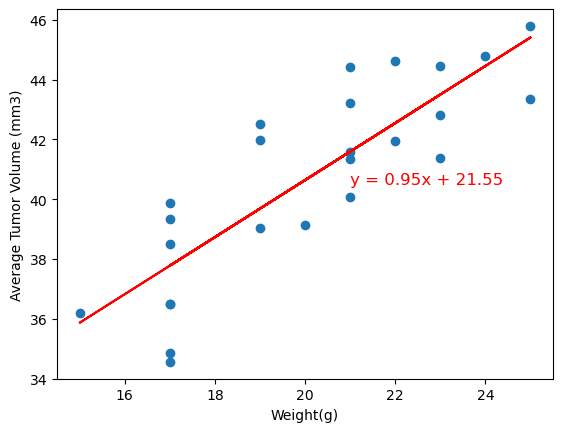

In [26]:
#for the mouse weight and average observed tumor volume for the Capomulin regimen
# import linregress to plot line of best fit, disply the equation
#calculate the pearsons correlation coefficient 
from scipy.stats import linregress
mean_tumor_volumes = cap_mice.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
weight=cap_mice.groupby("Mouse ID")["Weight (g)"].mean()
plt.scatter(weight,mean_tumor_volumes)
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight(g)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight,mean_tumor_volumes)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(21,40.5),fontsize=12,color="red")
plt.plot(weight,regress_values,"r-")
correlation = st.pearsonr(weight,mean_tumor_volumes)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")